### TASK1

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spocket_df=pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx",sheet_name=None,skiprows=1)
spocket_df.keys()

dict_keys(['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress'])

In [3]:
Transactions=spocket_df['Transactions']
NewCustomerList=spocket_df['NewCustomerList']
CustomerDemographic=spocket_df['CustomerDemographic']
CustomerAddress=spocket_df['CustomerAddress']

## Transactions

In [4]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [6]:
Transactions.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [7]:
Transactions[Transactions.duplicated(keep=False)]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


In [8]:
null_pct=Transactions.isna().sum()/len(Transactions)*100
null_pct

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

In [9]:
ls=['list_price','standard_cost','product_first_sold_date']

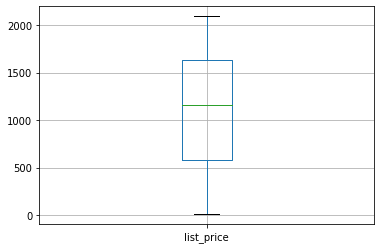

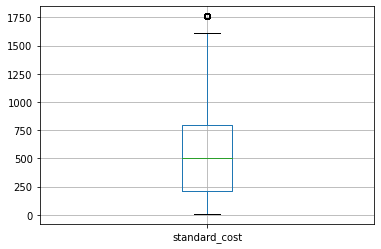

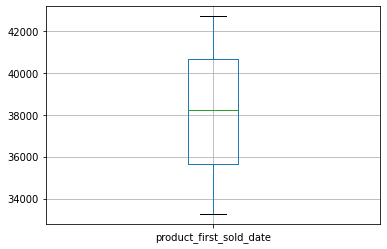

In [10]:
for cols in ls:
    plt.figure()
    Transactions.boxplot([cols])

In [11]:
from scipy.stats import iqr
UT=Transactions['standard_cost'].quantile(.75)+iqr(Transactions['standard_cost'])*1.5
LT=Transactions['standard_cost'].quantile(.25)-iqr(Transactions['standard_cost'])*1.5
Transactions['standard_cost']=Transactions['standard_cost'].clip(lower=LT,upper=UT)

/home/user/.local/lib/python3.6/site-packages/pandas/core/generic.py:7360: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result[mask] = np.nan


In [12]:
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [21]:
values={'brand':Transactions['brand'].mode()[0],'product_line':Transactions['product_line'].mode()[0],
        'product_class':Transactions['product_class'].mode()[0],
      'product_size':Transactions['product_size'].mode()[0],'standard_cost':Transactions['standard_cost'].mean(),
      'product_first_sold_date':Transactions['product_first_sold_date'].mean(),
        'online_order':Transactions['online_order'].median()}

In [23]:
Transactions=Transactions.fillna(value=values)

### NewCustomerList

In [8]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [14]:
NewCustomerList[NewCustomerList.duplicated(keep=False)]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value


In [9]:
NewCustomerList.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [77]:
NewCustomerList.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
Unnamed: 16                                   float64
Unnamed: 17                                   float64
Unnamed: 18                 

In [78]:
NewCustomerList.isna().sum()/len(NewCustomerList)*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Unnamed: 16                             0.0
Unnamed: 17                             0.0
Unnamed: 18                             0.0
Unnamed: 19                             0.0
Unnamed: 20                             0.0
Rank                                    0.0
Value                           

In [79]:
NewCustomerList['last_name']=NewCustomerList['last_name'].fillna('NA')
NewCustomerList['DOB']=NewCustomerList['DOB'].fillna('NA')

In [80]:
NewCustomerList['job_industry_category']=NewCustomerList['job_industry_category'].mode()[0]

In [81]:
NewCustomerList['job_title']=NewCustomerList['job_title'].fillna('NA')

In [82]:
ls=['Rank', 'Value', 'property_valuation','past_3_years_bike_related_purchases']

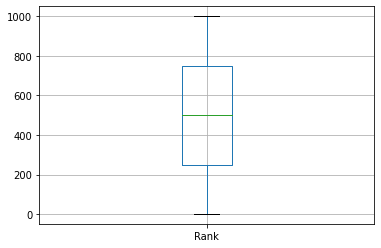

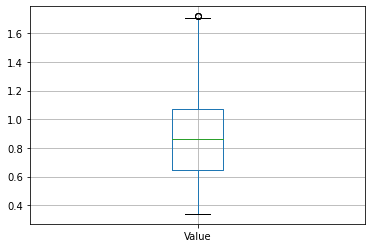

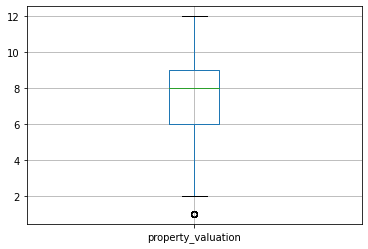

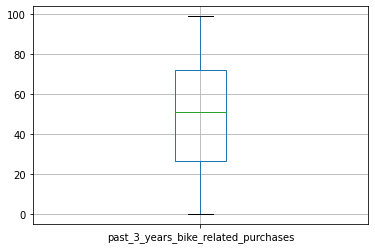

In [83]:
for cols in ls:
    plt.figure()
    NewCustomerList.boxplot([cols])

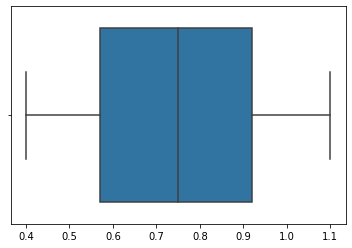

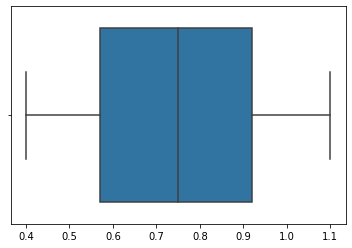

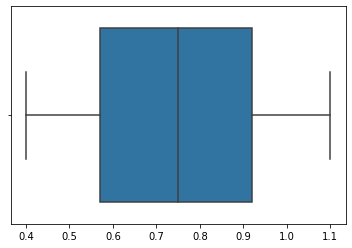

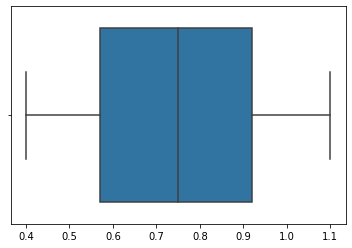

In [84]:
for i in range(16,20):
    plt.figure()
    sns.boxplot(NewCustomerList.iloc[:,[16]]);

In [85]:
ls=['Value','property_valuation']
for col in ls:
    UT=NewCustomerList[col].quantile(.75)+iqr(NewCustomerList[col])*1.5
    LT=NewCustomerList[col].quantile(.25)-iqr(NewCustomerList[col])*1.5
    NewCustomerList[col]=NewCustomerList[col].clip(lower=LT,upper=UT)

In [91]:
NewCustomerList[NewCustomerList['DOB']!="NA"]['DOB'].sort_values()

797   1938-06-08
885   1938-06-09
769   1938-08-05
585   1938-08-30
265   1938-08-31
         ...    
996   2001-10-17
475   2001-12-29
763   2002-01-04
396   2002-01-17
354   2002-02-27
Name: DOB, Length: 983, dtype: datetime64[ns]

### CustomerDemographic

In [93]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [15]:
CustomerDemographic[CustomerDemographic.duplicated(keep=False)]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure


In [97]:
CustomerDemographic.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

In [95]:
CustomerDemographic.isna().sum()/len(CustomerDemographic)

customer_id                            0.00000
first_name                             0.00000
last_name                              0.03125
gender                                 0.00000
past_3_years_bike_related_purchases    0.00000
DOB                                    0.02175
job_title                              0.12650
job_industry_category                  0.16400
wealth_segment                         0.00000
deceased_indicator                     0.00000
default                                0.07550
owns_car                               0.00000
tenure                                 0.02175
dtype: float64

In [11]:
CustomerDemographic['gender'].unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [13]:
CustomerDemographic=CustomerDemographic.replace({'gender':{'Male':'M','Female':'F','Femal':'F'}})

In [102]:
CustomerDemographic['DOB'].sort_values()

33     1843-12-21
719    1931-10-23
1091   1935-08-22
3409   1940-09-22
2412   1943-08-11
          ...    
3778          NaT
3882          NaT
3930          NaT
3934          NaT
3997          NaT
Name: DOB, Length: 4000, dtype: datetime64[ns]

In [103]:
CustomerDemographic=CustomerDemographic.drop("default",axis=1)

In [105]:
CustomerDemographic=CustomerDemographic.drop(33)

In [106]:
CustomerDemographic['last_name']=CustomerDemographic['last_name'].fillna('NA')
CustomerDemographic['DOB']=CustomerDemographic['DOB'].fillna('NA')

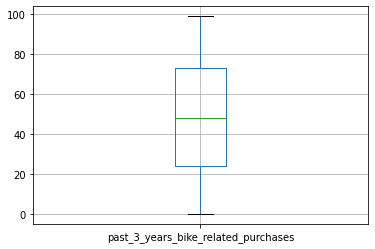

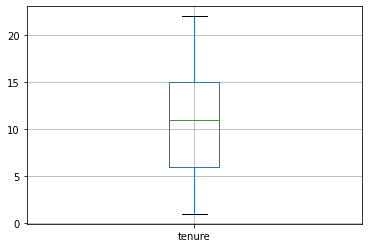

In [107]:
ls=['past_3_years_bike_related_purchases','tenure']
for col in ls:
    plt.figure()
    CustomerDemographic.boxplot([col])

In [109]:
values={'job_title':CustomerDemographic['job_title'].mode()[0],'job_industry_category':CustomerDemographic['job_industry_category'].mode()[0],
       'tenure':CustomerDemographic['tenure'].mean()}
CustomerDemographic=CustomerDemographic.fillna(value=values)

### CustomerAddress

In [110]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [16]:
CustomerAddress[CustomerAddress.duplicated(keep=False)]

,customer_id,address,postcode,state,country,property_valuation


In [111]:
CustomerAddress.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

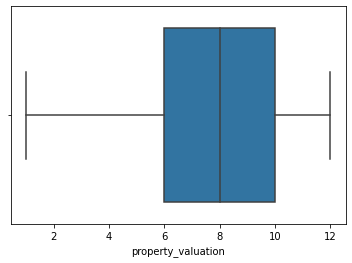

In [113]:
sns.boxplot(CustomerAddress['property_valuation']);